In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.metrics.pairwise import cosine_similarity

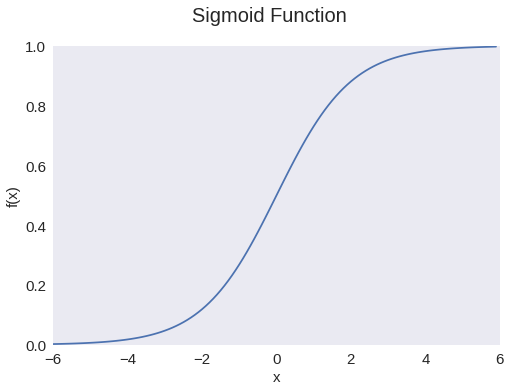

In [0]:
x = np.array(np.arange(-6, 6, 0.1))
y = 1/(1+ np.exp(-x))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, y)
ax.grid()
fig.suptitle("Sigmoid Function", fontsize = 20)
ax.set_xlim([-6,6])
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("f(x)", fontsize = 15)
ax.set_ylim([0,1])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig("sig.png", dpi = 600)
plt.show()

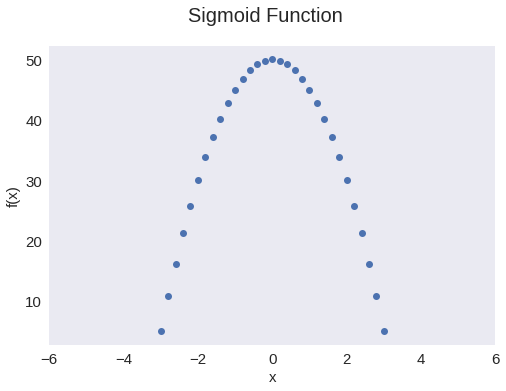

In [0]:
x = np.array(np.arange(-3, 3.2, 0.2))
y = -5*x**2+ 50
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, y, 'o')
ax.grid()
fig.suptitle("Sigmoid Function", fontsize = 20)
ax.set_xlim([-6,6])
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("f(x)", fontsize = 15)
# ax.set_ylim([0,1])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig("sig.png", dpi = 600)
plt.show()

In [0]:
up_data = pd.read_csv("up_data.csv", header = 0)

1动画 11电视剧 119 鬼畜 12公告 129舞蹈 13番剧  155时尚 160生活 165广告 167国创 177纪录片 181影视 23电影 3音乐 36科技 4游戏 5娱乐

In [0]:
up_data.tail()

,upid,follower,count,1,11,119,12,129,13,155,160,165,167,177,181,23,3,36,4,5
27627,145960003,24645,214,0,0,0,0,0,0,0,2,0,0,0,0,0,45,167,0,0
27628,145962918,57017,514,0,0,0,0,0,0,0,9,0,0,0,0,0,0,504,1,0
27629,146114255,7393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27630,146115786,18654,15,0,0,0,0,0,0,0,4,0,0,0,0,0,0,11,0,0
27631,146164010,23837,125,1,0,0,0,0,0,0,26,0,68,0,0,0,11,0,19,0


对每个up主的特征矩阵进行归一化处理

In [3]:
feature_matrix = up_data.iloc[:,3:]
min_max_scaler = MinMaxScaler()
scaled_feature_matrix = min_max_scaler.fit_transform(feature_matrix.T).T
scaled_up = pd.DataFrame(scaled_feature_matrix, columns =[up_data.columns[3:].values])
scaled_up = pd.concat([up_data.iloc[:,0:3], scaled_up], axis = 1)
scaled_up.columns = up_data.columns.values

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [4]:
scaled_up.head()

,upid,follower,count,1,11,119,12,129,13,155,160,165,167,177,181,23,3,36,4,5
0,96868400,77896,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,96934627,10524,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.818182,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0
2,96942476,7178,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,96951340,15054,216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.029268,0.0,0.0,0.004878,0.0,0.019512,0.0,0.0,1.0
4,96953274,15797,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [0]:
user_data = pd.read_csv("final_result.csv", header=0)      

In [0]:
user_data.loc[0:0,:]

,userid,upid_0,upid_1,upid_2,upid_3,upid_4,upid_5,upid_6,upid_7,upid_8,...,upid_40,upid_41,upid_42,upid_43,upid_44,upid_45,upid_46,upid_47,upid_48,upid_49
0,3164,27070210,197608993,2082556,324844204,88155259,269409587,2444380,107226227,164569140,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [0]:
user_following = user_data.iloc[:,1:]
user_following.shape

(43741, 50)

分离train test

In [0]:
test_column = ((50 - user_data[user_data == -1].count(axis=1))*0.3).astype(int).values
train_column = 50 -test_column
train_filter = np.array([np.append(np.zeros(test), np.ones(train)) for test, train in zip(test_column, train_column)])
test_filter = np.array([np.append(np.ones(test), np.zeros(train)) for test, train in zip(test_column, train_column)])

In [0]:
user_following_train = np.multiply(user_following, train_filter)
user_following_test = np.multiply(user_following, test_filter)

In [0]:
follow_reshape_train = user_following_train.values.reshape(user_following.shape[0]*user_following.shape[1])
follow_reshape_test = user_following_test.values.reshape(user_following.shape[0]*user_following.shape[1])
follow_reshape_train = pd.DataFrame(follow_reshape_train, columns=['upid']).astype(int)
follow_reshape_test = pd.DataFrame(follow_reshape_test, columns=['upid']).astype(int)
follow_reshape_train.head()

,upid
0,0
1,0
2,0
3,0
4,0


In [0]:
follow_reshape_test.head()

,upid
0,27070210
1,197608993
2,2082556
3,324844204
4,88155259


合并user_following 和 up_data

In [0]:
up_data.shape

(27632, 20)

In [0]:
follow_reshape_train.shape

(2187050, 1)

In [0]:
follow_up_info_train = follow_reshape_train.join(scaled_up.set_index('upid'), on='upid').fillna(0)
follow_up_info_test = follow_reshape_test.join(scaled_up.set_index('upid'), on='upid').fillna(0)

In [0]:
follow_up_info_train.head()

,upid,follower,count,1,11,119,12,129,13,155,160,165,167,177,181,23,3,36,4,5
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
follow_up_info_test.head()

,upid,follower,count,1,11,119,12,129,13,155,160,165,167,177,181,23,3,36,4,5
0,27070210,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,197608993,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,2082556,10568.0,57.0,0.47619,0.0,0.380952,0.0,0.0,0.0,0.0,0.47619,0.0,0.0,0.0,0.0,0.0,0.285714,0.0,1.0,0.095238
3,324844204,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,88155259,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [0]:
follow_up_info_train.shape

(2187050, 20)

In [0]:
follow_up_info_test.iloc[49:51,:]

,upid,follower,count,1,11,119,12,129,13,155,160,165,167,177,181,23,3,36,4,5
49,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,326282657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
follow_up_info_tender_train = follow_up_info_train.values.reshape(user_following.shape[0], user_following.shape[1], follow_up_info_train.shape[1])
follow_up_info_tender_test = follow_up_info_test.values.reshape(user_following.shape[0], user_following.shape[1], follow_up_info_test.shape[1])

In [0]:
follow_up_info_tender_test [0:1,2:3,3:]

array([[[0.47619048, 0.        , 0.38095238, 0.        , 0.        ,
         0.        , 0.        , 0.47619048, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.28571429, 0.        ,
         1.        , 0.0952381 ]]])

In [0]:
follow_up_info_tender_train [0:1,10:11,3:]

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.]]])

In [0]:
test_char = pd.DataFrame(np.sum(follow_up_info_tender_test[:,:,3:], axis=1), columns=up_data.columns[3:])
train_char = pd.DataFrame(np.sum(follow_up_info_tender_train[:,:,3:], axis=1), columns=up_data.columns[3:])
test_char = pd.concat([user_data['userid'], test_char], axis = 1)
train_char = pd.concat([user_data['userid'], train_char], axis = 1)
test_char.head()

,userid,1,11,119,12,129,13,155,160,165,167,177,181,23,3,36,4,5
0,3164,0.476190,0.0,0.380952,0.0,0.000000,0.000000,0.000000,0.476190,0.000000,0.000000,0.000000,0.000000,0.0,0.285714,1.000000,1.000000,0.095238
1,5269,0.000000,0.0,0.117647,0.0,1.611466,0.000000,0.588987,7.267645,0.112987,0.000000,1.466425,1.633348,0.0,1.031195,3.174829,1.452351,0.034483
2,5615,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,6269,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.004608,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,1.000000,0.000000
4,8078,5.166667,0.0,0.000000,0.0,0.000302,0.115385,0.074555,2.500544,0.041782,0.042553,0.000000,1.090379,0.0,1.395415,4.177905,3.722292,0.115686


In [0]:
train_char.head()

,userid,1,11,119,12,129,13,155,160,165,167,177,181,23,3,36,4,5
0,3164,1.012579,0.000000,0.000000,0.0,0.000000,0.000000,1.009434,2.883117,0.006289,0.000000,0.000000,0.053459,0.0,1.618868,1.336478,0.603896,0.072327
1,5269,0.092614,1.009709,0.020798,0.0,0.045455,0.016580,0.093074,10.401197,0.109270,0.004310,3.836951,0.311446,1.0,0.160632,10.795034,7.067823,1.563545
2,5615,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,6269,0.713976,0.000000,0.174419,0.0,0.000000,0.000000,0.001623,1.076214,0.067183,0.000000,0.000000,0.013708,0.0,0.040926,3.014649,5.018393,0.000000
4,8078,9.194974,1.000000,0.054950,0.0,0.300000,2.078699,0.100000,6.361703,0.001049,0.395898,1.008533,0.300859,1.0,1.522076,8.125797,4.926134,0.495311


In [0]:
train_char.to_csv("train_char.csv", index=False)
test_char.to_csv("test_char.csv", index=False)

In [0]:
np.multiply(train_char.iloc[:,1:].values, train_char.iloc[:,1:].values)

array([[1.02531545e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.78617341e+00, 3.64690504e-01, 5.23120130e-03],
       [8.57739724e-03, 1.01951174e+00, 4.32540109e-04, ...,
        1.16532760e+02, 4.99541226e+01, 2.44467191e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.20704913e-05, 0.00000000e+00, 6.00925425e-05, ...,
        1.43208900e-05, 6.40000000e+01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

计算cosine距离

In [0]:
scaled_up.to_csv('scaled_up_data.csv',index=False)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.metrics.pairwise import cosine_similarity

In [0]:
train_char = pd.read_csv('train_char.csv', header=0)
test_char = pd.read_csv('test_char.csv', header=0)
scaled_up = pd.read_csv('scaled_up_data.csv', header=0)

In [0]:
train_char_s = train_char.sample(frac=0.01, random_state=2018)
test_char_s = test_char.sample(frac=0.01, random_state=2018)

#user_content

In [0]:
user_up_sim = cosine_similarity(train_char_s.iloc[:,1:],scaled_up.iloc[:,3:])

In [0]:
user_up_sim = pd.DataFrame(user_up_sim, columns=scaled_up['upid'].values)

In [53]:
train_char_s.shape

(437, 18)

In [54]:
user_up_sim.head()

,96868400,96934627,96942476,96951340,96953274,96957569,96976165,97005726,97007164,97020604,...,145684084,145706655,145819550,145839363,145946928,145960003,145962918,146114255,146115786,146164010
0,0.0,0.406075,0.0,0.023518,0.0,0.013622,0.049077,0.566505,0.074190,0.877370,...,0.174977,0.022517,0.037940,0.076412,0.003644,0.186247,0.185958,0.0,0.374186,0.222178
1,0.0,0.418081,0.0,0.045335,0.0,0.301507,0.173516,0.554614,0.632399,0.484633,...,0.155563,0.043983,0.610754,0.630523,0.290986,0.164288,0.167530,0.0,0.353454,0.439742
2,0.0,0.285702,0.0,0.021704,0.0,0.240178,0.822081,0.392403,0.193040,0.184338,...,0.225531,0.016757,0.381637,0.303743,0.233202,0.226905,0.233501,0.0,0.359140,0.193987
3,0.0,0.605098,0.0,0.422543,0.0,0.106754,0.352532,0.599928,0.038224,0.418961,...,0.000480,0.412569,0.095570,0.198052,0.096730,0.119857,0.008544,0.0,0.154684,0.517140
4,0.0,0.208995,0.0,0.020415,0.0,0.188280,0.054298,0.627127,0.494289,0.067629,...,0.202229,0.005364,0.465845,0.477602,0.182910,0.395500,0.208906,0.0,0.300603,0.355302


In [0]:
user_up_sim_t = user_up_sim.T
user_up_sim_t.columns = train_char_s['userid'].values

In [83]:
user_up_sim_t.shape

(27632, 437)

In [0]:
user_up_recommend = [user_up_sim_t.nlargest(10, i).index.values for i in user_up_sim_t.columns.values]

In [130]:
np.array(user_up_recommend).shape

(437, 10)

In [0]:
user_up_recommend_df = pd.DataFrame(np.array(user_up_recommend), columns = ['recommend_up_%d'%i for i in range(10)])

In [368]:
user_up_recommend_df.tail()

,recommend_up_0,recommend_up_1,recommend_up_2,recommend_up_3,recommend_up_4,recommend_up_5,recommend_up_6,recommend_up_7,recommend_up_8,recommend_up_9,userid
432,11115509,2414649,258582552,11102585,20980855,196800492,192362377,76158,4265830,38501463,49985582
433,43070,2558805,11263788,21183636,174856679,26087186,33682792,10303637,36285401,291626970,3460702
434,53495576,2813456,7347303,8820583,19241887,243684418,2033840,10303637,5150024,4779837,1559249
435,277694,27301,347444224,7655977,25000899,117343966,2236888,2141768,5182754,8931689,128975564
436,358326313,8928587,287031700,8856864,3066865,12898510,12638317,35994246,24812187,3394333,383224766


In [367]:
user_following_test_s.tail()

,upid_0,upid_1,upid_2,upid_3,upid_4,upid_5,upid_6,upid_7,upid_8,upid_9,...,upid_41,upid_42,upid_43,upid_44,upid_45,upid_46,upid_47,upid_48,upid_49,userid
21186,32786875.0,203708804.0,2806019.0,283119882.0,118525932.0,51930062.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,49985582
2124,3989101.0,30588461.0,14734162.0,883968.0,7392261.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3460702
976,35903247.0,4346540.0,12820125.0,5798753.0,101666496.0,8492739.0,6787891.0,326166281.0,4573722.0,9136870.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1559249
28792,10804055.0,273056597.0,113362335.0,34804756.0,466272.0,41728403.0,12968717.0,15472244.0,296372245.0,65416580.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128975564
43411,18469222.0,302296464.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,383224766


In [137]:
user_up_recommend_df.iloc[:,:5].shape

(437, 5)

In [0]:
def get_recommend_measure(recommend_df, up_info, test_char):
  us_up_re_res = recommend_df.values.reshape(recommend_df.shape[0]*recommend_df.shape[1])
  us_up_re_res = pd.DataFrame({'upid': us_up_re_res})
  user_up_re_tender = us_up_re_res.join(up_info.set_index('upid'), on='upid').iloc[:,3:].values.reshape(recommend_df.shape[0], recommend_df.shape[1], -1)
  user_up_recom_char = pd.DataFrame(np.sum(user_up_re_tender, axis=1))
  user_up_recom_test_sim = cosine_similarity(test_char.iloc[:,1:],user_up_recom_char)
  user_up_recom_test_sim_perform = pd.DataFrame({'upid':test_char['userid'].values,'sim':np.diag(user_up_recom_test_sim)})
  return user_up_recom_test_sim_perform

In [0]:
user_up_recom_test_sim_perform_8 = get_recommend_measure(user_up_recommend_df.iloc[:,:8], scaled_up, test_char_s)

In [142]:
user_up_recom_test_sim_perform_8.sim.median()

0.8097299534060233

In [0]:
us_up_med = []
us_up_avg = []
for i in range(1,11,1):
  us_up_med.append(get_recommend_measure(user_up_recommend_df.iloc[:,:i], scaled_up, test_char_s).sim.median())
  us_up_avg.append(get_recommend_measure(user_up_recommend_df.iloc[:,:i], scaled_up, test_char_s).sim.mean())
us_up_med = np.array(us_up_med)
us_up_avg = np.array(us_up_avg)

In [353]:
print(us_up_med)
print(us_up_avg)

[0.79477799 0.7952348  0.80032236 0.804826   0.81401996 0.80553777
 0.80886932 0.80972995 0.8111415  0.80740422]
[0.67819059 0.68046792 0.68258509 0.68287122 0.68395237 0.68362694
 0.68404976 0.68462215 0.68499724 0.68484349]


In [0]:
mf_med = np.array([0.8159, 0.8207, 0.8235, 0.8270, 0.8404, 0.8455, 0.8489, 0.8504, 0.8521, 0.8506])
mf_avg = np.array([0.6726, 0.6842, 0.6845, 0.6884, 0.6923, 0.6933, 0.6964, 0.7008, 0.7041, 0.7045])

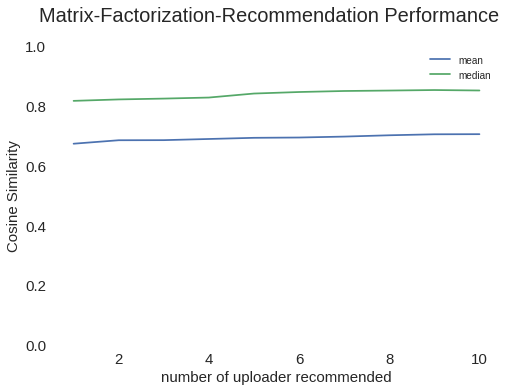

In [361]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(1,11),mf_avg, label="mean")
ax.plot(np.arange(1,11), mf_med, label="median")
fig.suptitle("Matrix-Factorization-Recommendation Performance", fontsize = 20)
ax.set_xlabel("number of uploader recommended", fontsize = 15)
ax.set_ylabel("Cosine Similarity", fontsize = 15)
ax.set_ylim([0,1])
ax.patch.set_facecolor("white") 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend()
plt.savefig("MF.png", dpi = 600)
plt.show()

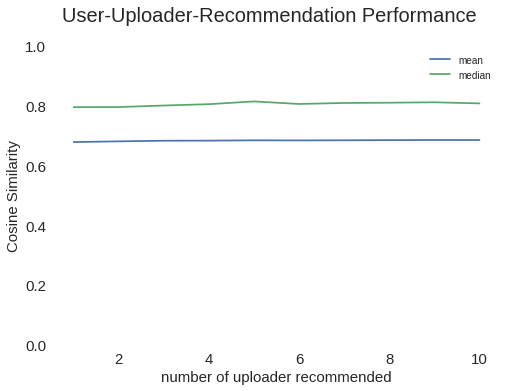

In [352]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(1,11),us_up_avg, label="mean")
ax.plot(np.arange(1,11), us_up_med, label="median")
fig.suptitle("User-Uploader-Recommendation Performance", fontsize = 20)
ax.set_xlabel("number of uploader recommended", fontsize = 15)
ax.set_ylabel("Cosine Similarity", fontsize = 15)
ax.set_ylim([0,1])
ax.patch.set_facecolor("white") 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend()
plt.savefig("US-UP.png", dpi = 600)
plt.show()

In [0]:
user_up_recommend_df_with_id = user_up_recommend_df
user_up_recommend_df_with_id['userid'] = train_char_s['userid'].values

In [0]:
user_up_recommend_df_with_id.to_csv('user_up_recommend.csv', index=False)

In [0]:
us_up_re_res = user_up_recommend_df.values.reshape(user_up_recommend_df.shape[0]*user_up_recommend_df.shape[1])

In [0]:
user_up_re_res = pd.DataFrame({'upid': us_up_re_res})

In [91]:
user_up_re_res.join(scaled_up.set_index('upid'), on='upid').head().iloc[:,3:]

,1,11,119,12,129,13,155,160,165,167,177,181,23,3,36,4,5
0,0.003979,0.0,0.0,0.0,0.0000,0.0,1.0,0.848806,0.0,0.002653,0.000000,0.035809,0.0,0.006631,0.217507,0.001326,0.01061
1,0.000000,0.0,0.0,0.0,0.0000,0.0,1.0,0.888889,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.222222,0.000000,0.00000
2,0.000000,0.0,0.0,0.0,0.0000,0.0,1.0,0.939394,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.363636,0.000000,0.00000
3,0.000000,0.0,0.0,0.0,0.0000,0.0,1.0,0.714286,0.0,0.000000,0.047619,0.000000,0.0,0.000000,0.095238,0.000000,0.00000
4,0.000000,0.0,0.0,0.0,0.0625,0.0,1.0,0.875000,0.0,0.000000,0.000000,0.000000,0.0,0.062500,0.062500,0.062500,0.00000


In [0]:
user_up_re_tender =user_up_re_res.join(scaled_up.set_index('upid'), on='upid').iloc[:,3:].values.reshape(user_up_recommend_df.shape[0], user_up_recommend_df.shape[1], -1)

In [0]:
user_up_recom_char = pd.DataFrame(np.sum(user_up_re_tender, axis=1))

In [0]:
user_up_recom_test_sim = cosine_similarity(test_char_s.iloc[:,1:],user_up_recom_char)

In [104]:
test_char_s.head()

,userid,1,11,119,12,129,13,155,160,165,167,177,181,23,3,36,4,5
26569,98626384,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.00,1.031915,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
22269,60706700,1.000000,0.0,0.000000,0.0,1.001799,0.0,2.25,4.354446,0.0,0.000000,0.0,0.124542,0.0,1.485538,0.000000,3.860121,0.017721
26494,97386838,0.061798,0.0,0.000000,0.0,1.000000,0.0,0.00,2.140845,0.0,0.016854,0.0,4.000000,0.0,0.023438,0.008000,1.014085,0.013514
3733,6813166,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.005464,0.000000,0.000000,1.000000
14815,28178692,1.361186,0.0,0.005714,0.0,0.000000,0.0,0.00,1.161064,0.0,0.042677,0.0,1.000000,0.0,5.450427,0.015385,3.084037,0.000000


In [0]:
user_up_recom_test_sim_perform = pd.DataFrame({'upid':test_char_s['userid'].values,'sim':np.diag(user_up_recom_test_sim)})

In [108]:
user_up_recom_test_sim_perform.sim.median()

0.8074042201183079

In [0]:
user_up_recom_test_sim_perform.to_csv('user_up_recom_test_sim_perform_10.csv', index=False)

#user_user

In [0]:
user_user_sim = cosine_similarity(train_char_s.iloc[:,1:],train_char_s.iloc[:,1:])

In [0]:
user_user_sim_df = pd.DataFrame(user_user_sim, columns=train_char_s.userid.values, index = train_char_s.userid.values)

In [0]:
user_user_recommend = np.array([user_user_sim_df.nlargest(11, i).index.values for i in user_user_sim_df.columns.values])

In [157]:
user_user_recommend.shape

(437, 11)

In [0]:
user_user_recommend_df = pd.DataFrame(np.array(user_user_recommend), columns = ['close_user_%d'%i for i in range(-1, 10, 1)])

In [0]:
user_user_recommend_df.drop(['close_user_-1'], axis=1, inplace=True)

In [168]:
user_user_recommend_df.head()

,close_user_0,close_user_1,close_user_2,close_user_3,close_user_4,close_user_5,close_user_6,close_user_7,close_user_8,close_user_9
0,249209530,287749282,32764873,49482047,278079461,65581304,233242663,19021264,30024139,71184415
1,32435636,15363009,2160949,166328737,50302385,142219972,28603359,34679926,10800000,53677713
2,181695320,7140151,247335578,17405913,156964705,16442687,240332080,6532739,383224766,277448735
3,244457498,179704038,272791582,59452904,2675643,2541945,355605911,280698663,62313678,43419207
4,27128598,39727249,141599038,1290368,87681794,13676413,50097360,234607290,40892694,73299045


In [217]:
user_user_recommend_df.shape

(437, 10)

In [0]:
user_data = pd.read_csv("final_result.csv", header=0)
user_data_s = user_data.sample(frac=0.01, random_state=2018)

In [0]:
test_column = ((50 - user_data_s[user_data_s == -1].count(axis=1))*0.3).astype(int).values
train_column = 50 -test_column
train_filter = np.array([np.append(np.zeros(test), np.ones(train)) for test, train in zip(test_column, train_column)])
test_filter = np.array([np.append(np.ones(test), np.zeros(train)) for test, train in zip(test_column, train_column)])

In [0]:
user_following_s = user_data_s.iloc[:,1:]

In [0]:
user_following_train_s = np.multiply(user_following_s, train_filter)
user_following_test_s = np.multiply(user_following_s, test_filter)

In [0]:
user_following_test_s['userid'] = user_data_s['userid'].values

In [0]:
us_us_recon_reshape = user_user_recommend_df.values.reshape(user_user_recommend_df.shape[0]*user_user_recommend_df.shape[1])

In [0]:
us_us_recon_reshape = pd.DataFrame({"userid":us_us_recon_reshape})

In [185]:
us_us_recon_reshape.shape

(4370, 1)

In [0]:
us_us_up = us_us_recon_reshape.join(user_following_test_s.set_index('userid'), on='userid')

In [0]:
us_us_up.drop(['userid'], axis=1,inplace=True)

In [218]:
us_us_up.shape

(4370, 50)

In [0]:
us_us_up_reshape = us_us_up.values.reshape(us_us_up.shape[0]*us_us_up.shape[1])

In [0]:
us_us_up_reshape = pd.DataFrame({"upid":us_us_up_reshape})

In [0]:
us_us_up_char = us_us_up_reshape.join(scaled_up.set_index('upid'), on='upid').fillna(0)

In [215]:
us_us_up_char.shape

(218500, 20)

In [216]:
us_us_up_char.head()

,upid,follower,count,1,11,119,12,129,13,155,160,165,167,177,181,23,3,36,4,5
0,7824219.0,138140.0,26.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.130435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,210497820.0,153915.0,50.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,466272.0,1643997.0,106.0,0.0,0.0,0.0,0.0,0.011111,0.0,1.0,0.155556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011111,0.0
3,43618809.0,201173.0,70.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [223]:
user_data_s['userid'].shape

(437,)

In [0]:
us_us_up_char['userid'] = np.array([user_data_s['userid'].values[np.int(i/500)] for i in range(500*user_data_s.shape[0])])

In [230]:
us_us_up_char.iloc[498:501,:]

,upid,follower,count,1,11,119,12,129,13,155,...,165,167,177,181,23,3,36,4,5,userid
498,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,98626384
499,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,98626384
500,350819093.0,98670.0,115.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00885,0.0,0.00885,0.0,0.0,0.0,0.0,0.0,60706700


In [0]:
def get_us_us_rec_per_mea(us_us_up_char, order_col, k, test_char_s):
  us_us_up_rec_index = us_us_up_char.groupby(['userid'])[order_col].nlargest(k).index.values
  us_us_up_rec_index = [i[1] for i in us_us_up_rec_index]
  us_us_up_rec_df = us_us_up_char.loc[us_us_up_rec_index].reset_index(drop=True)
  us_us_up_rec_df['upid']=us_us_up_rec_df['upid'].astype('int')
  us_us_up_rec_tender = us_us_up_rec_df.iloc[:,3:-1].values.reshape(np.int(us_us_up_rec_df.shape[0]/k), k ,-1)
  us_us_up_rec_matrix = np.sum(us_us_up_rec_tender, axis=1)
  us_us_up_rec_char = pd.DataFrame(us_us_up_rec_matrix, columns=us_us_up_rec_df.columns.values[3:-1])
  us_us_up_rec_char['userid'] = test_char_s['userid'].values
  us_us_up_recom_sim = pd.DataFrame({"userid":test_char_s['userid'].values,"sim":np.diag(cosine_similarity(us_us_up_rec_char.iloc[:,:-1], test_char_s.iloc[:,1:]))})
  return us_us_up_recom_sim

In [0]:
us_us_up_recom_sim_fol_10 = get_us_us_rec_per_mea(us_us_up_char, 'follower', 5, test_char_s)

In [321]:
us_us_up_recom_sim_fol_10.sim.mean()

0.4965925167520143

In [0]:
us_us_per_cnt_med = []
us_us_per_cnt_avg = []
for i in range(1,11,1):
  us_us_per_cnt_avg.append(get_us_us_rec_per_mea(us_us_up_char, 'follower', i, test_char_s).sim.mean())
  us_us_per_cnt_med.append(get_us_us_rec_per_mea(us_us_up_char, 'follower', i, test_char_s).sim.median())
us_us_per_cnt_avg = np.array(us_us_per_cnt_avg)
us_us_per_cnt_med = np.array(us_us_per_cnt_med)

In [354]:
print(us_us_per_cnt_med)
print(us_us_per_cnt_avg)

[0.24053832 0.44342314 0.47161971 0.51323838 0.52703929 0.53809511
 0.54416374 0.56819805 0.57291838 0.57860888]
[0.35537725 0.43020095 0.45245258 0.4822048  0.49659252 0.50480529
 0.50488251 0.51201988 0.51621996 0.5159287 ]


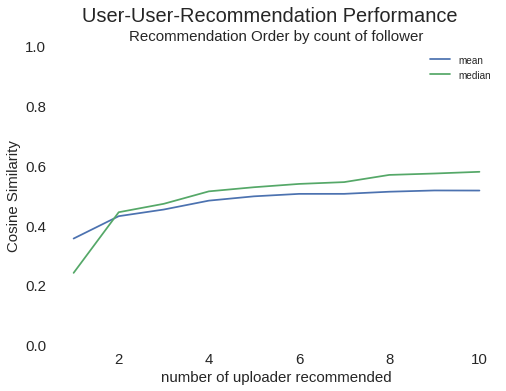

In [347]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(1,11),us_us_per_cnt_avg, label="mean")
ax.plot(np.arange(1,11), us_us_per_cnt_med, label="median")
fig.suptitle("User-User-Recommendation Performance", fontsize = 20)
plt.title("Recommendation Order by count of follower", fontsize = 15)
plt.grid()
ax.set_xlabel("number of uploader recommended", fontsize = 15)
ax.set_ylabel("Cosine Similarity", fontsize = 15)
ax.set_ylim([0,1])
ax.patch.set_facecolor("white") 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend()
plt.savefig("US-US-fol.png", dpi = 600)
plt.show()

In [0]:
us_us_per_vc_med = []
us_us_per_vc_avg = []
for i in range(1,11,1):
  us_us_per_vc_avg.append(get_us_us_rec_per_mea(us_us_up_char, 'count', i, test_char_s).sim.mean())
  us_us_per_vc_med.append(get_us_us_rec_per_mea(us_us_up_char, 'count', i, test_char_s).sim.median())
us_us_per_vc_avg = np.array(us_us_per_vc_avg)
us_us_per_vc_med = np.array(us_us_per_vc_med)

In [355]:
print(us_us_per_vc_med)
print(us_us_per_vc_avg)

[0.20722365 0.38316711 0.44397193 0.43889745 0.44521709 0.46034913
 0.48569177 0.48357982 0.49005318 0.50845291]
[0.33573006 0.40232786 0.42332303 0.43648074 0.44827935 0.4598968
 0.46706906 0.46893815 0.47709608 0.48105216]


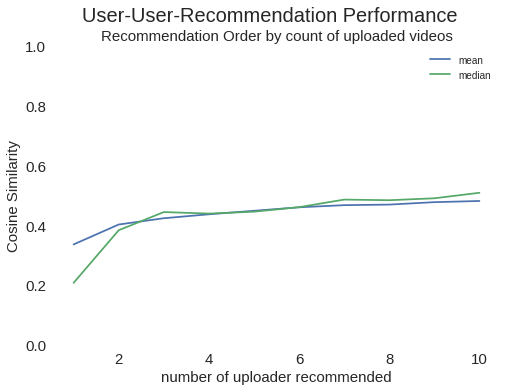

In [348]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(1,11),us_us_per_vc_avg, label="mean")
ax.plot(np.arange(1,11), us_us_per_vc_med, label="median")
fig.suptitle("User-User-Recommendation Performance", fontsize = 20)
plt.title("Recommendation Order by count of uploaded videos", fontsize = 15)
plt.grid()
ax.set_xlabel("number of uploader recommended", fontsize = 15)
ax.set_ylabel("Cosine Similarity", fontsize = 15)
ax.set_ylim([0,1])
ax.patch.set_facecolor("white") 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend()
plt.savefig("US-US-vid.png", dpi = 600)
plt.show()

In [0]:
us_us_up_rec_cnt_index = us_us_up_char.groupby(['userid'])['count'].nlargest(10).index.values

In [0]:
us_us_up_rec_cnt_index = [i[1] for i in us_us_up_rec_cnt_index]

In [0]:
us_us_up_rec_cnt_df = us_us_up_char.loc[us_us_up_rec_cnt_index].reset_index(drop=True)
us_us_up_rec_cnt_df['upid']=us_us_up_rec_cnt_df['upid'].astype('int')

In [269]:
us_us_up_rec_cnt_df.head()

,upid,follower,count,1,11,119,12,129,13,155,...,165,167,177,181,23,3,36,4,5,userid
0,221648,2777674.0,10705.0,0.023839,0.0,0.004517,0.0,0.000502,0.002258,0.042911,...,0.005772,0.000502,0.003011,0.300627,0.0,0.189460,0.922459,0.043162,0.147302,196164
1,17423372,24660.0,5374.0,0.001491,0.0,0.000000,0.0,0.000000,0.000000,0.000497,...,0.002485,0.000000,0.000000,0.006958,0.0,0.003728,0.000249,0.029573,0.290507,196164
2,19419058,531382.0,1058.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000951,1.000000,0.000000,196164
3,164715833,465056.0,803.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.001247,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,196164
4,25623387,239929.0,755.0,0.001389,0.0,0.000000,0.0,0.000000,0.000000,0.011111,...,0.000000,0.000000,0.000000,0.006944,0.0,0.019444,0.001389,0.005556,0.002778,196164


In [0]:
us_us_up_rec_cnt_df.to_csv("us_us_up_rec_cnt.csv", index=False)

In [0]:
us_us_up_rec_cnt_tender = us_us_up_rec_cnt_df.iloc[:,3:-1].values.reshape(user_user_recommend_df.shape[0], 10 ,-1)

In [0]:
us_us_up_rec_cnt_matrix = np.sum(us_us_up_rec_cnt_tender, axis=1)

In [0]:
us_us_up_rec_char_cnt = pd.DataFrame(us_us_up_rec_cnt_matrix, columns=us_us_up_rec_cnt_df.columns.values[3:-1])
us_us_up_rec_char_cnt['userid'] = user_data_s['userid'].values

In [284]:
us_us_up_rec_char_cnt.head()

,1,11,119,12,129,13,155,160,165,167,177,181,23,3,36,4,5,userid
0,0.117673,0.0,0.079764,0.0,0.002463,0.002258,0.102828,6.021477,0.219346,0.037776,0.003011,2.360075,0.0,0.235725,0.928969,2.255443,0.442218,98626384
1,0.037190,0.0,0.008666,0.0,0.209267,0.002258,0.102877,5.266131,0.005772,0.000502,0.003011,0.321015,0.0,0.303278,1.052545,4.061044,1.289084,60706700
2,1.009501,0.0,0.007722,0.0,0.000000,0.000000,0.000000,0.404633,0.000000,0.004082,0.000000,0.265306,0.0,1.068591,0.000000,7.606211,1.000959,97386838
3,0.023839,0.0,0.004517,0.0,0.209267,0.002258,0.064305,2.254805,0.005772,0.000502,0.008206,0.300627,0.0,0.191702,0.925551,7.043162,1.147302,6813166
4,0.090606,0.0,0.011272,0.0,0.025013,0.001748,0.050018,3.333639,0.011390,0.194056,0.008277,1.055846,0.0,1.008793,2.061610,3.133779,0.381664,28178692


In [0]:
us_us_up_recom_sim_cnt = pd.DataFrame({"userid":test_char_s['userid'].values,"sim":np.diag(cosine_similarity(us_us_up_rec_char_cnt.iloc[:,:-1], test_char_s.iloc[:,1:]))})

In [292]:
us_us_up_recom_sim_cnt.sim.median()

0.5084529129230762

In [0]:
us_us_up_recom_sim_cnt.to_csv("us_us_up_recom_sim_cnt.csv", index=False)